In [1]:
!pip install BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [44]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = 	BERTopic.load("Israel_Hamas_ControversialComments_model", embedding_model=embedding_model)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
topics = topic_model.get_topics()
topics_words = {}

for topic_num, words in topics.items():
    words = [word.lower() for word, prob in words]
    for word in words:
        if word in topics_words:
            topics_words[word] += 1
        else:
            topics_words[word] = 1

In [6]:
topics_words = {k: v for k, v in topics_words.items() if k!=''}
topics_words = sorted(topics_words.items(), key=lambda x: x[1], reverse=True)
topics_words = dict(topics_words)

In [7]:
israel_hamas_keywords = [
    "Hamas", "Gaza", "Israel", "IDF", "West Bank", "war crime", "Human Rights Watch", "Hezbollah",
    "Amnesty International", "Al-Shifa Hospital", "United Nations", "hostages", "Jabalia refugee camp",
    "ceasefire", "UNRWA", "airstrikes", "collective punishment", "invasion", "Antony Blinken",
    "Shin Bet", "international humanitarian law", "Operation Al-Aqsa Flood", "UNICEF",
    "International Criminal Court", "Yoav Gallant", "genocide", "Ismail Haniyeh",
    "World Health Organization", "blockade", "Operation Protective Edge", "Doctors Without Borders",
    "Tel Aviv", "Fatah", "human shields", "Mahmoud Abbas", "Rafah Border Crossing",
    "crimes against humanity", "Al-Aqsa Mosque", "humanitarian crisis", "Islamophobia",
    "two-state solution", "Denial of atrocities", "Al Jazeera", "UN Security Council",
    "Committee to Protect Journalists", "Rafah crossing", "Al-Ahli Arab Hospital", "Indonesia Hospital",
    "antisemitism", "journalists killed", "Iron Dome", "Church of Saint Porphyrius", "international law",
    "Mossad", "Operation Cast Lead", "Recep Tayyip Erdoğan", "humanitarian truce", "rocket",
    "aerial bombardment", "Netanyahu", "Casualties", "humanitarian aid", "ethnic cleansing",
    "medical supplies", "emergency unity government", "USS Gerald R. Ford", "Oxfam",
    "Qassam Brigades", "Beit Hanoun", "Middle East", "Red Cross", "East Jerusalem", "Six Day War",
    "First Intifada", "demonstrations", "Justin Trudeau", "Gilad Shalit", "UN Human Rights Council",
    "Death to Arabs", "Fourth Geneva Convention", "Indonesian Hospital", "Oslo Accords",
    "humanitarian pauses", "terrorist attack", "Islamic Jihad", "Eilat", "sexual violence",
    "white phosphorus", "Antonio Guterres", "Operation Pillar of Defense", "ICRC", "Palestine",
    "Ghazi Hamad", "Abdul-Malik al-Houthi", "Second Intifada", "Operation Swords of Iron",
    "USS Carney", "Bureij", "Daniel Hagari", "terrorist organization", "Ceasefire", "Rishi Sunak",
    "Olaf Scholz", "COGAT", "right to self-defense", "humanitarian corridor", "Khan Yunis",
    "human rights violations", "Lebanon", "Nuseirat refugee camp", "propaganda",
    "Al-Shifa ambulance airstrike", "Al-Rantisi Hospital", "Be’eri", "Palestinian", "militant groups",
    "violence against journalists", "ambulance convoy", "al-Shifa hospital", "Rashida Tlaib",
    "Al-Shati refugee camp", "Omar Daraghmeh", "Nukhba", "Abdel Fattah el-Sisi", "tunnel entrance",
    "tunnel network", "prisoner exchanges", "starvation", "medical facilities", "state of war",
    "Yom Kippur War", "Operation Summer Rains", "Khaled Mashal", "solar panels", "medical neutrality",
    "Yahya Sinwar", "Red Sea", "Francesca Albanese", "apartheid", "United States support", "hate crime",
    "International reactions", "refugee camps", "drone strikes", "mosques", "Sderot",
    "Al-Quds Brigades", "al-Maghazi refugee camp", "terrorism", "Disinformation", "military aid",
    "crime against humanity", "weapons storage", "drones", "evacuation", "Mohammed bin Salman",
    "anti-tank missiles", "Houthi movement", "Nakba", "massacre", "El Hamma synagogue",
    "administrative detention"
]

In [8]:
# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

# Helper function to compute BERT embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=32)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Precompute embeddings for all Israel-Hamas keywords
def compute_keyword_embeddings(keywords):
    embeddings = {}
    for keyword in keywords:
        embeddings[keyword] = get_embeddings(keyword)
    return embeddings

keyword_embeddings = compute_keyword_embeddings(israel_hamas_keywords)

# Function to compute the score for a new word/phrase
def compute_score_for_category(word):
    word_embedding = get_embeddings(word)
    similarities = [
        cosine_similarity(word_embedding.unsqueeze(0).numpy(), embed.unsqueeze(0).numpy())[0][0]
        for embed in keyword_embeddings.values()
    ]
    # Compute the average similarity score
    score = np.mean(similarities)
    return score

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
base_filtered_words_scores = {}

In [13]:
new_words = list(topics_words.keys())

for word in new_words:
    score = compute_score_for_category(word)
    base_filtered_words_scores[word] = score

In [65]:
import json

# Transform the data into the desired format
formatted_data = [{"word": key, "score": round(float(value), 5)} for key, value in base_filtered_words_scores.items()]

# Save to JSON file
with open("base_filtered_words_scores.json", "w") as file:
    json.dump(formatted_data, file, indent=4)

print("Data saved to base_filtered_words_scores.json!")


Data saved to base_filtered_words_scores.json!


In [56]:
filtered_words_scores = base_filtered_words_scores.copy()

In [57]:
filtered_words_scores = {k: v for k, v in filtered_words_scores.items() if v > 0.6}
filtered_words_scores = dict(sorted(filtered_words_scores.items(), key=lambda x: x[1], reverse=True))

In [58]:
# top N words
top_n = 50
words = list(filtered_words_scores.keys())
counts = list([topics_words[word] for word in words])

data = dict(sorted(zip(words[:], counts[:]), key=lambda x: x[1], reverse=True))
words = list(data.keys())
counts = list(data.values())

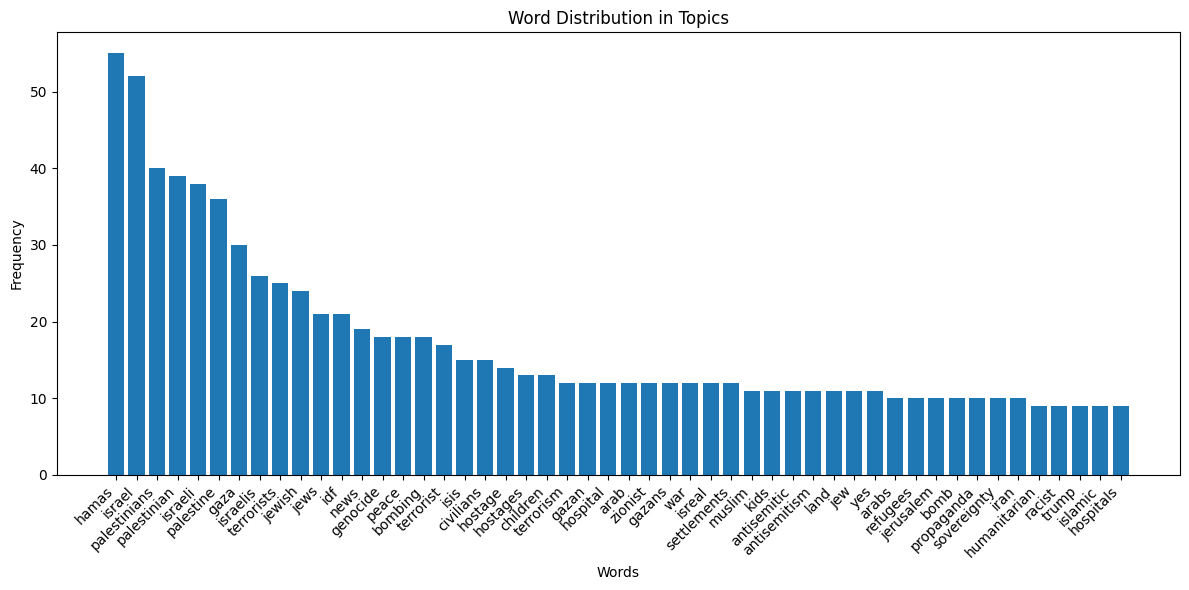

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(words[:50], counts[:top_n])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Distribution in Topics")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

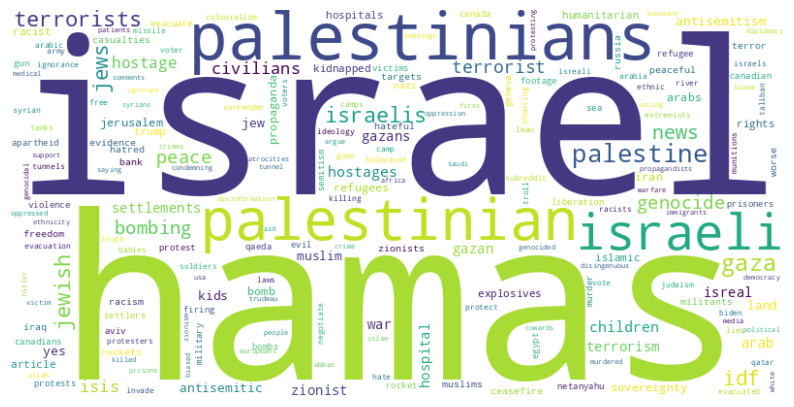

In [60]:
word_count_dict = dict(zip(words, counts))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

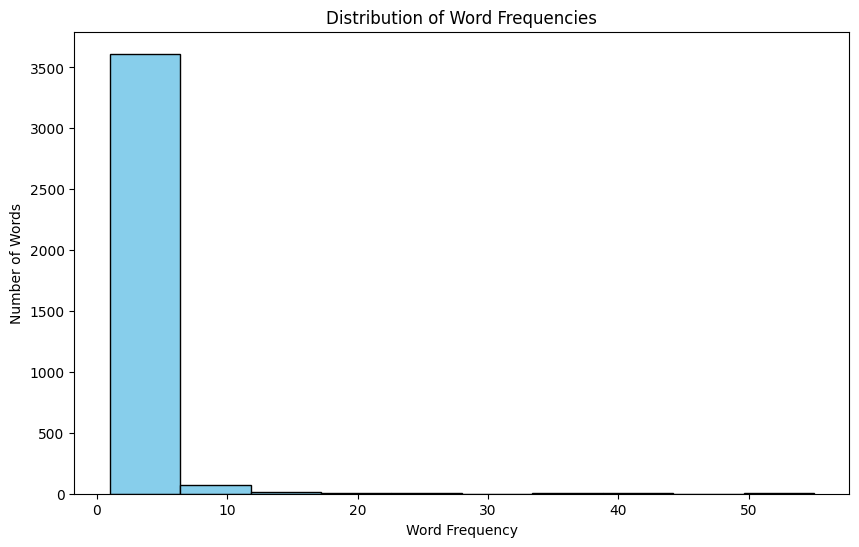

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Frequencies")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.show()

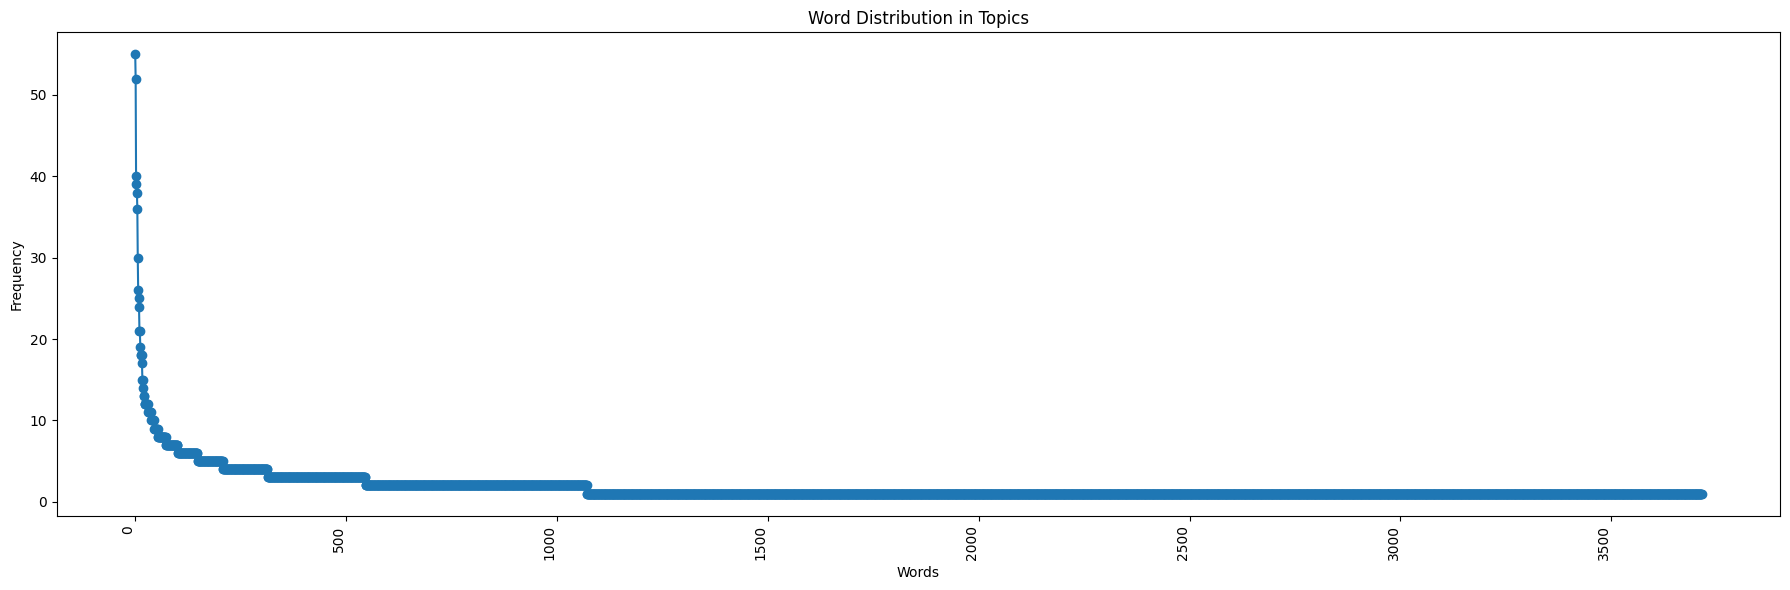

In [62]:
# each word is assigned a number for clear visualization
key_nums = list(range(1, len(data) + 1))
plt.figure(figsize=(18, 6))
plt.plot(key_nums, counts[:], marker='o')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Distribution in Topics")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()